In [ ]:
import requests
response = requests.get('https://fakestoreapi.com/products')
print(response.json())

[{'id': 1, 'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops', 'price': 109.95, 'description': 'Your perfect pack for everyday use and walks in the forest. Stash your laptop (up to 15 inches) in the padded sleeve, your everyday', 'category': "men's clothing", 'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_t.png', 'rating': {'rate': 3.9, 'count': 120}}, {'id': 2, 'title': 'Mens Casual Premium Slim Fit T-Shirts ', 'price': 22.3, 'description': 'Slim-fitting style, contrast raglan long sleeve, three-button henley placket, light weight & soft fabric for breathable and comfortable wearing. And Solid stitched shirts with round neck made for durability and a great fit for casual fashion wear and diehard baseball fans. The Henley style round neckline includes a three-button placket.', 'category': "men's clothing", 'image': 'https://fakestoreapi.com/img/71-3HjGNDUL._AC_SY879._SX._UX._SY._UY_t.png', 'rating': {'rate': 4.1, 'count': 259}}, {'id': 3, 'title': 'Mens Cot

In [ ]:
import requests
import json
import pandas as pd
response = requests.get('https://fakestoreapi.com/products')
response.raise_for_status()
data = response.json()
df = pd.DataFrame(data)
print(response.json())
print(df.shape)
print(df.head())
df = pd.DataFrame(response.json())

[{'id': 1, 'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops', 'price': 109.95, 'description': 'Your perfect pack for everyday use and walks in the forest. Stash your laptop (up to 15 inches) in the padded sleeve, your everyday', 'category': "men's clothing", 'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_t.png', 'rating': {'rate': 3.9, 'count': 120}}, {'id': 2, 'title': 'Mens Casual Premium Slim Fit T-Shirts ', 'price': 22.3, 'description': 'Slim-fitting style, contrast raglan long sleeve, three-button henley placket, light weight & soft fabric for breathable and comfortable wearing. And Solid stitched shirts with round neck made for durability and a great fit for casual fashion wear and diehard baseball fans. The Henley style round neckline includes a three-button placket.', 'category': "men's clothing", 'image': 'https://fakestoreapi.com/img/71-3HjGNDUL._AC_SY879._SX._UX._SY._UY_t.png', 'rating': {'rate': 4.1, 'count': 259}}, {'id': 3, 'title': 'Mens Cot

In [ ]:
print(df.columns)
print(df.info)
print(df.describe())
print(df.isnull().sum())
print(df.head())



Index(['id', 'title', 'price', 'description', 'category', 'image', 'rating'], dtype='object')
<bound method DataFrame.info of     id                                              title   price  \
0    1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...  109.95   
1    2             Mens Casual Premium Slim Fit T-Shirts    22.30   
2    3                                 Mens Cotton Jacket   55.99   
3    4                               Mens Casual Slim Fit   15.99   
4    5  John Hardy Women's Legends Naga Gold & Silver ...  695.00   
5    6                       Solid Gold Petite Micropave   168.00   
6    7                         White Gold Plated Princess    9.99   
7    8  Pierced Owl Rose Gold Plated Stainless Steel D...   10.99   
8    9  WD 2TB Elements Portable External Hard Drive -...   64.00   
9   10  SanDisk SSD PLUS 1TB Internal SSD - SATA III 6...  109.00   
10  11  Silicon Power 256GB SSD 3D NAND A55 SLC Cache ...  109.00   
11  12  WD 4TB Gaming Drive Works with Playsta

using the sample data  above we can have a general view of the store merchendise : categories , prices , products,descriptions ,and ammonts .
based on this data:
store products ar ediveded in 4 categories : mens and womens clothing and accesories , electronics, jewelery.


In [ ]:

import pandas as pd


if not isinstance(df, pd.DataFrame):


    df = pd.DataFrame(data)


df['rating_rate'] = df['rating'].apply(lambda x: x['rate'])
df['rating_count'] = df['rating'].apply(lambda x: x['count'])


print(df.head())

   id                                              title   price  \
0   1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...  109.95   
1   2             Mens Casual Premium Slim Fit T-Shirts    22.30   
2   3                                 Mens Cotton Jacket   55.99   
3   4                               Mens Casual Slim Fit   15.99   
4   5  John Hardy Women's Legends Naga Gold & Silver ...  695.00   

                                         description        category  \
0  Your perfect pack for everyday use and walks i...  men's clothing   
1  Slim-fitting style, contrast raglan long sleev...  men's clothing   
2  great outerwear jackets for Spring/Autumn/Wint...  men's clothing   
3  The color could be slightly different between ...  men's clothing   
4  From our Legends Collection, the Naga was insp...        jewelery   

                                               image  \
0  https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...   
1  https://fakestoreapi.com/img/71-3HjGNDUL._A

The Fake Store API returned product data with a nested ‘rating’ field containing ‘rate’ and ‘count’.
To enable category-level or statistical analysis of ratings, I flattened these into their own numeric columns using pandas apply—a critical step for prepping data prior to aggregation or visualization.

In [ ]:
print(df.groupby('category')['price'].mean())
print(df.groupby('category')['rating_rate'].mean())
print(df.groupby('category')['rating_count'].mean())

category
electronics         332.498333
jewelery            220.995000
men's clothing       51.057500
women's clothing     26.286667
Name: price, dtype: float64
category
electronics         3.483333
jewelery            3.350000
men's clothing      3.700000
women's clothing    3.683333
Name: rating_rate, dtype: float64
category
electronics         297.000000
jewelery            242.500000
men's clothing      327.250000
women's clothing    279.166667
Name: rating_count, dtype: float64


exploring the average price , rating, nad count, of this categories , we have a general view over the value destribution over the categories, a next step would be to analyse the sales data to draw conclusion over cost to income ratio and  AOV .

There is no true “cost” column (i.e., product cost-of-goods-sold; only price), but you can analyze revenue, AOV, and simulate some profit scenarios if you assume cost as a percentage or estimate.

Next Analyst Actions

Pull the “carts” data from

In [ ]:
import requests
carts_resp = requests.get('https://fakestoreapi.com/carts')
carts_data = carts_resp.json()
carts_df = pd.DataFrame(carts_data)
print(carts_df.head())


   id  userId                      date  \
0   1       1  2020-03-02T00:00:00.000Z   
1   2       1  2020-01-02T00:00:00.000Z   
2   3       2  2020-03-01T00:00:00.000Z   
3   4       3  2020-01-01T00:00:00.000Z   
4   5       3  2020-03-01T00:00:00.000Z   

                                            products  __v  
0  [{'productId': 1, 'quantity': 4}, {'productId'...    0  
1  [{'productId': 2, 'quantity': 4}, {'productId'...    0  
2  [{'productId': 1, 'quantity': 2}, {'productId'...    0  
3                  [{'productId': 1, 'quantity': 4}]    0  
4  [{'productId': 7, 'quantity': 1}, {'productId'...    0  


the product column in charts_df contains nested list, next step is to analyze order-level metrics

In [ ]:
import json
carts_exploded=carts_df.explode('products')
carts_exploded['productId']=carts_exploded['products'].apply(lambda x:x['productId'])
carts_exploded['quantity']=carts_exploded['products'].apply(lambda x:x['quantity'])
carts_exploded=carts_exploded.drop('products',axis=1)
print(carts_exploded.head())

   id  userId                      date  __v  productId  quantity
0   1       1  2020-03-02T00:00:00.000Z    0          1         4
0   1       1  2020-03-02T00:00:00.000Z    0          2         1
0   1       1  2020-03-02T00:00:00.000Z    0          3         6
1   2       1  2020-01-02T00:00:00.000Z    0          2         4
1   2       1  2020-01-02T00:00:00.000Z    0          1        10


In [ ]:
carts with products to calculate revenue

In [ ]:
# Merge to get product prices
carts_with_prices = carts_exploded.merge(
    df[['id', 'price', 'category']],
    left_on='productId',
    right_on='id',
    how='left'
)

# Calculate line item revenue
carts_with_prices['revenue'] = carts_with_prices['price'] * carts_with_prices['quantity']

print(carts_with_prices.head())
print(f"\nTotal Revenue: ${carts_with_prices['revenue'].sum():,.2f}")


   id_x  userId                      date  __v  productId  quantity  id_y  \
0     1       1  2020-03-02T00:00:00.000Z    0          1         4     1   
1     1       1  2020-03-02T00:00:00.000Z    0          2         1     2   
2     1       1  2020-03-02T00:00:00.000Z    0          3         6     3   
3     2       1  2020-01-02T00:00:00.000Z    0          2         4     2   
4     2       1  2020-01-02T00:00:00.000Z    0          1        10     1   

    price        category  revenue  
0  109.95  men's clothing   439.80  
1   22.30  men's clothing    22.30  
2   55.99  men's clothing   335.94  
3   22.30  men's clothing    89.20  
4  109.95  men's clothing  1099.50  

Total Revenue: $4,691.27


Calculate AOV (Average Order Value)

In [ ]:
order_summary = carts_with_prices.groupby('id_x').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'userId': 'first',
    'date': 'first'
}).reset_index()

order_summary.rename(columns={'revenue': 'order_value', 'quantity': 'total_items'}, inplace=True)

# Calculate AOV
aov = order_summary['order_value'].mean()
print(f"Average Order Value (AOV): ${aov:.2f}")
print(f"Median Order Value: ${order_summary['order_value'].median():.2f}")
print(f"\nOrder Summary Statistics:")
print(order_summary['order_value'].describe())

Average Order Value (AOV): $670.18
Median Order Value: $439.80

Order Summary Statistics:
count       7.000000
mean      670.181429
std       887.948941
min         9.850000
25%       152.440000
50%       439.800000
75%       679.020000
max      2578.700000
Name: order_value, dtype: float64


revenue by category

In [ ]:
# Revenue by category
category_revenue = carts_with_prices.groupby('category').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'id_x': 'count'  # number of cart line items
}).reset_index()

category_revenue.rename(columns={'id_x': 'line_items'}, inplace=True)
category_revenue = category_revenue.sort_values('revenue', ascending=False)

print("\nRevenue by Category:")
print(category_revenue)



Revenue by Category:
           category  revenue  quantity  line_items
2    men's clothing  2646.44        31           7
1          jewelery  1410.98         4           3
0       electronics   624.00         6           3
3  women's clothing     9.85         1           1


 Simulate profit margins

In [ ]:
# Assume different margins by category (industry estimates)
margin_assumptions = {
    'electronics': 0.15,      # 15% margin
    'jewelery': 0.40,         # 40% margin
    "men's clothing": 0.35,   # 35% margin
    "women's clothing": 0.35  # 35% margin
}

# Calculate estimated cost and profit
carts_with_prices['margin'] = carts_with_prices['category'].map(margin_assumptions)
carts_with_prices['cost'] = carts_with_prices['price'] * (1 - carts_with_prices['margin'])
carts_with_prices['profit'] = carts_with_prices['revenue'] * carts_with_prices['margin']

# Summary
print("\nProfit Analysis:")
print(f"Total Revenue: ${carts_with_prices['revenue'].sum():,.2f}")
print(f"Total Estimated Profit: ${carts_with_prices['profit'].sum():,.2f}")
print(f"Overall Profit Margin: {(carts_with_prices['profit'].sum() / carts_with_prices['revenue'].sum()) * 100:.1f}%")



Profit Analysis:
Total Revenue: $4,691.27
Total Estimated Profit: $1,587.69
Overall Profit Margin: 33.8%


Time-based analysis

In [ ]:
# Convert date to datetime
order_summary['date'] = pd.to_datetime(order_summary['date'])
order_summary['year_month'] = order_summary['date'].dt.to_period('M')

# Monthly revenue trends
monthly_revenue = order_summary.groupby('year_month').agg({
    'order_value': ['sum', 'mean', 'count']
}).reset_index()

monthly_revenue.columns = ['year_month', 'total_revenue', 'avg_order_value', 'num_orders']
print("\nMonthly Trends:")
print(monthly_revenue)



Monthly Trends:
  year_month  total_revenue  avg_order_value  num_orders
0    2020-01        3018.50         1509.250           2
1    2020-03        1672.77          334.554           5


/tmp/ipython-input-1688474895.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  order_summary['year_month'] = order_summary['date'].dt.to_period('M')


Python Code for CSV Export

In [ ]:
# Export order-level summary (AOV, etc.)
order_summary.to_csv('order_summary.csv', index=False)

# Export category revenue summary
category_revenue.to_csv('category_revenue.csv', index=False)

# Export most granular cart line items (with profit estimate)
carts_with_prices.to_csv('carts_with_prices.csv', index=False)

print("✅ CSV files created! You can now download and use them in Power BI.")


✅ CSV files created! You can now download and use them in Power BI.


In [ ]:
from google.colab import files

files.download('order_summary.csv')
files.download('category_revenue.csv')
files.download('carts_with_prices.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


Revenue by Category

/tmp/ipython-input-1072995326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='revenue', data=category_revenue, palette='viridis')


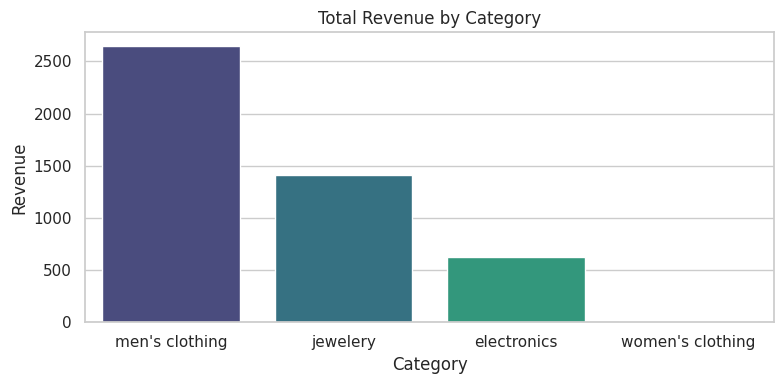

In [17]:
plt.figure(figsize=(8, 4))
sns.barplot(x='category', y='revenue', data=category_revenue, palette='viridis')
plt.title('Total Revenue by Category')
plt.ylabel('Revenue')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


Monthly Revenue Trend

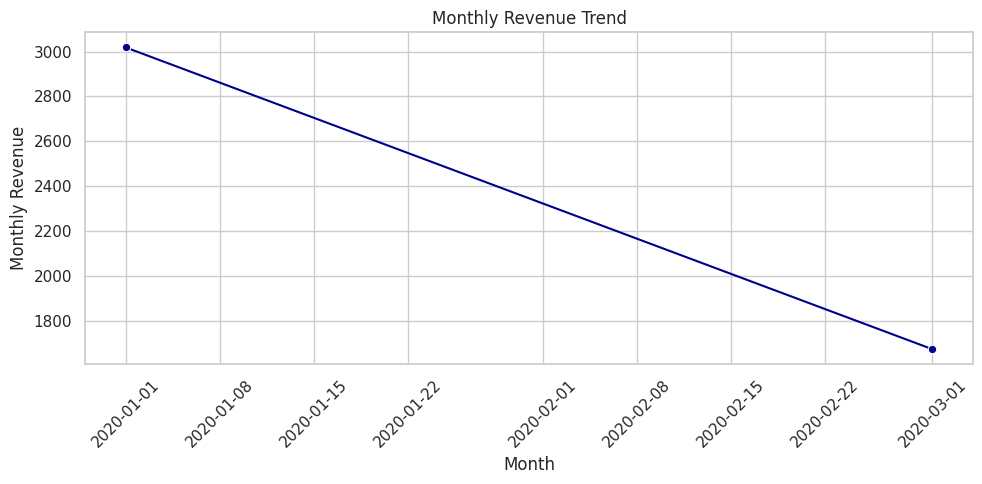

In [19]:
plt.figure(figsize=(10, 5))
# Convert 'year_month' Period objects to datetime for plotting
monthly_revenue['year_month_dt'] = monthly_revenue['year_month'].dt.to_timestamp()
sns.lineplot(x='year_month_dt', y='total_revenue', data=monthly_revenue, color='darkblue', marker='o')
plt.title('Monthly Revenue Trend')
plt.ylabel('Monthly Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top Products by Revenue

/tmp/ipython-input-406595948.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='productId', x='revenue', data=top_products, palette='coolwarm')


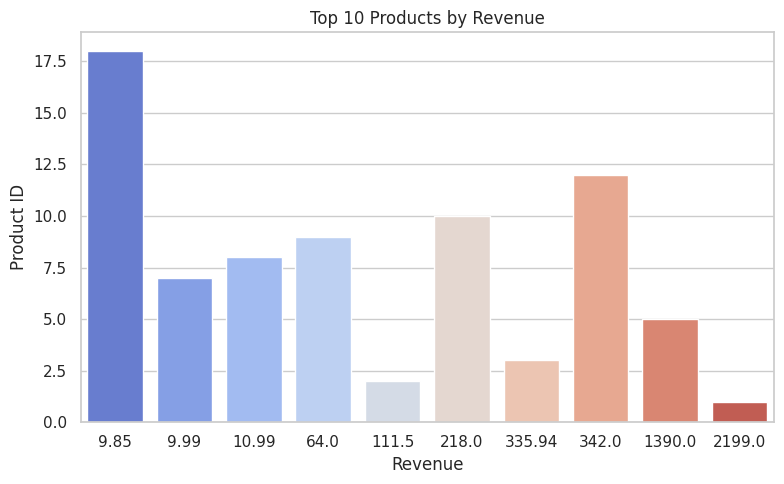

In [20]:
top_products = (
    carts_with_prices.groupby('productId')
    .agg({'revenue': 'sum'})
    .sort_values('revenue', ascending=False)
    .head(10)
    .reset_index()
)
plt.figure(figsize=(8, 5))
sns.barplot(y='productId', x='revenue', data=top_products, palette='coolwarm')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product ID')
plt.tight_layout()
plt.show()


Estimated Profit Margin by Category

/tmp/ipython-input-133429112.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='margin_pct', data=profit_by_category, palette='magma')


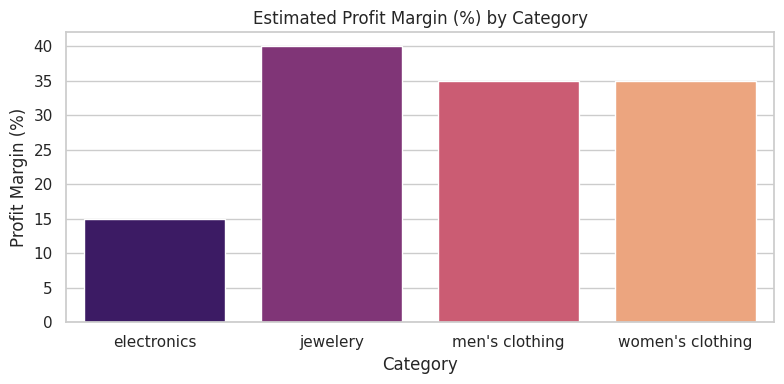

In [21]:
profit_by_category = (
    carts_with_prices.groupby('category')
    .agg({'profit': 'sum', 'revenue': 'sum'})
    .reset_index()
)
profit_by_category['margin_pct'] = (profit_by_category['profit'] / profit_by_category['revenue']) * 100

plt.figure(figsize=(8, 4))
sns.barplot(x='category', y='margin_pct', data=profit_by_category, palette='magma')
plt.title('Estimated Profit Margin (%) by Category')
plt.ylabel('Profit Margin (%)')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


Order Value Distribution (Histogram)

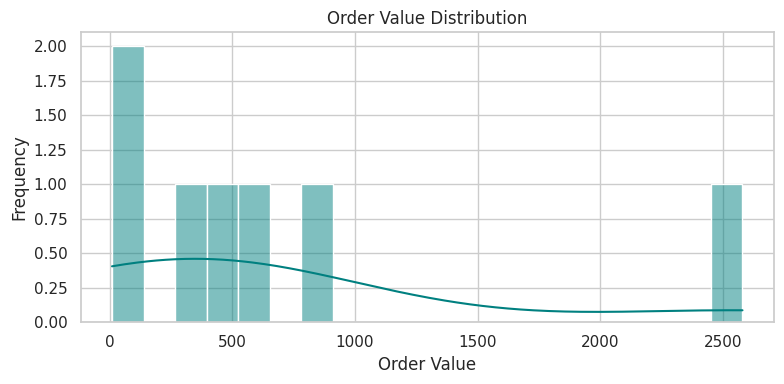

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(order_summary['order_value'], bins=20, kde=True, color='teal')
plt.title('Order Value Distribution')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
